In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_0p25GeV_0p004mm",
    "4Mu_500GeV_0p25GeV_0p04mm",
    "4Mu_500GeV_0p25GeV_0p4mm",
    "4Mu_500GeV_0p25GeV_2p0mm",
    "4Mu_500GeV_0p25GeV_4p0mm",   
    
    "4Mu_500GeV_1p2GeV_0p019mm",
    "4Mu_500GeV_1p2GeV_0p19mm",
    "4Mu_500GeV_1p2GeV_1p9mm",
    "4Mu_500GeV_1p2GeV_9p6mm",
    "4Mu_500GeV_1p2GeV_19p0mm",
    
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=10, location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=10, location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [5]:
samples_100_025 = [
    "TTJets",
    
    "4Mu_500GeV_0p25GeV_0p004mm",
    "4Mu_500GeV_0p25GeV_0p04mm",
    "4Mu_500GeV_0p25GeV_0p4mm",
    "4Mu_500GeV_0p25GeV_2p0mm",
    "4Mu_500GeV_0p25GeV_4p0mm",    
]

samples_100_125 = [
    "TTJets",
    
    "4Mu_500GeV_1p2GeV_0p019mm",
    "4Mu_500GeV_1p2GeV_0p19mm",
    "4Mu_500GeV_1p2GeV_1p9mm",
    "4Mu_500GeV_1p2GeV_9p6mm",
    "4Mu_500GeV_1p2GeV_19p0mm",
]

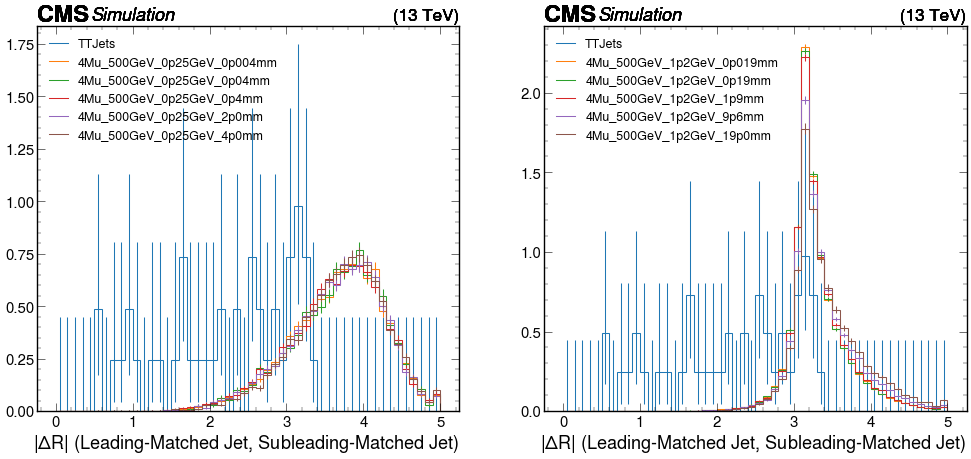

In [6]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=2, prop={'size': 18})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=2, prop={'size': 18})

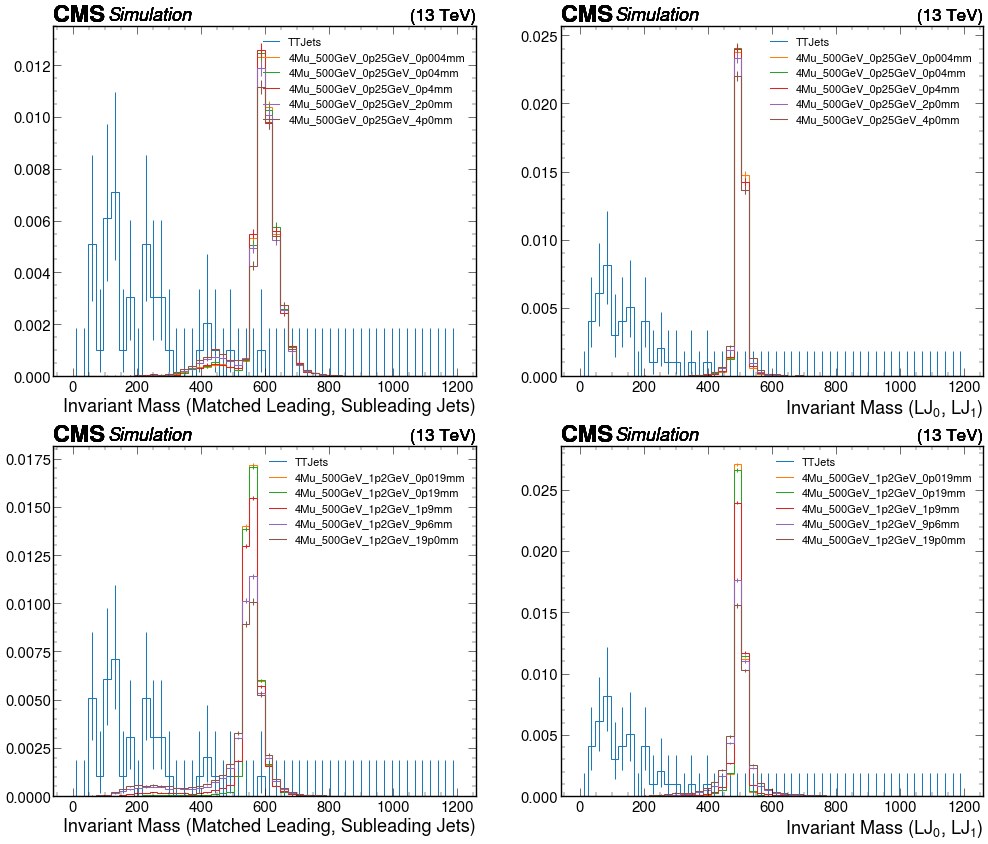

In [8]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

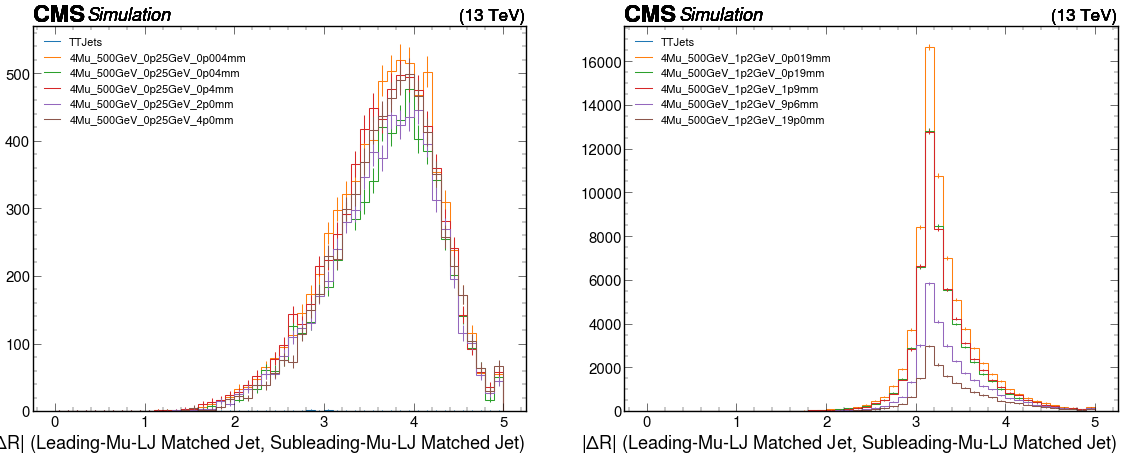

In [16]:
plt.subplots(1,2,figsize=(28,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=False)
plt.legend(samples_100_025, loc=2, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=False)
plt.legend(samples_100_125, loc=2, prop={'size': 16})

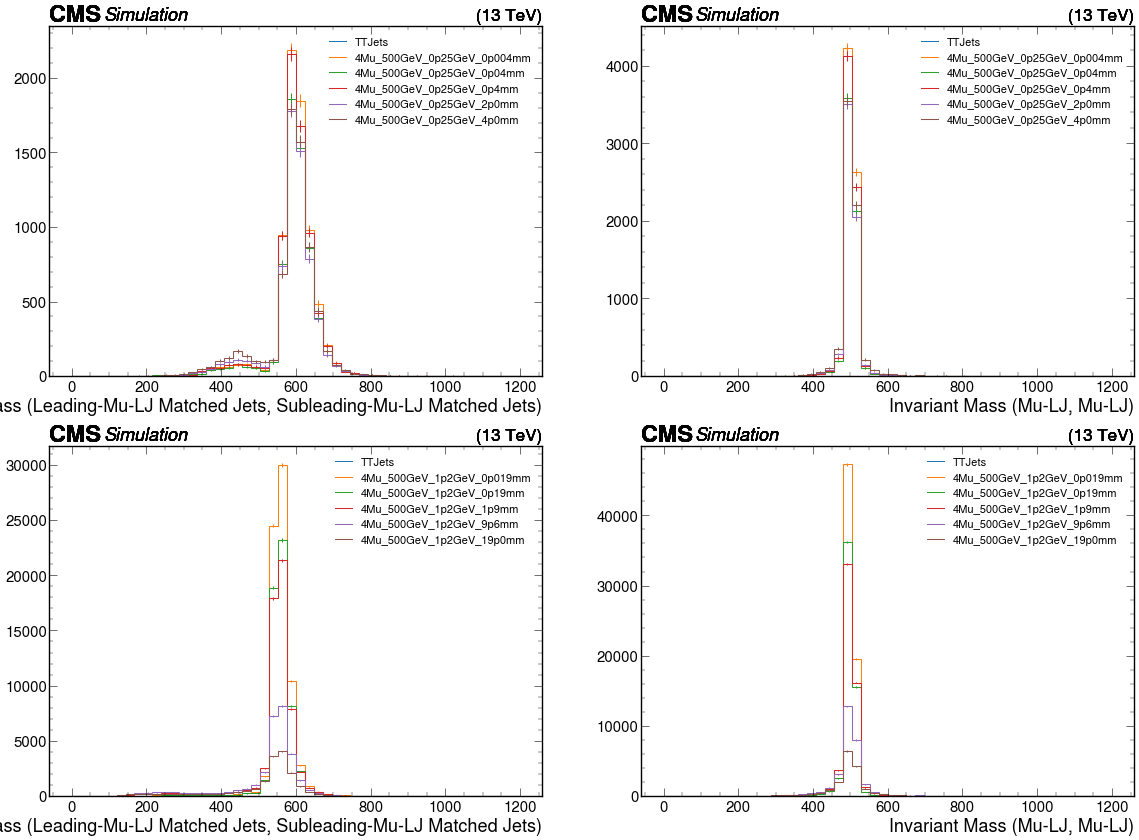

In [17]:
plt.subplots(2,2,figsize=(28,20))

plt.subplot(2,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=False)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=False)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=False)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=False)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

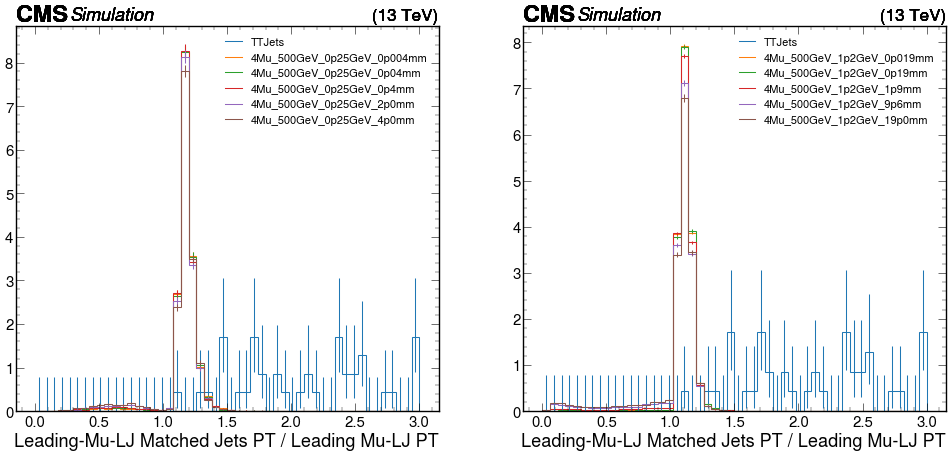

In [14]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

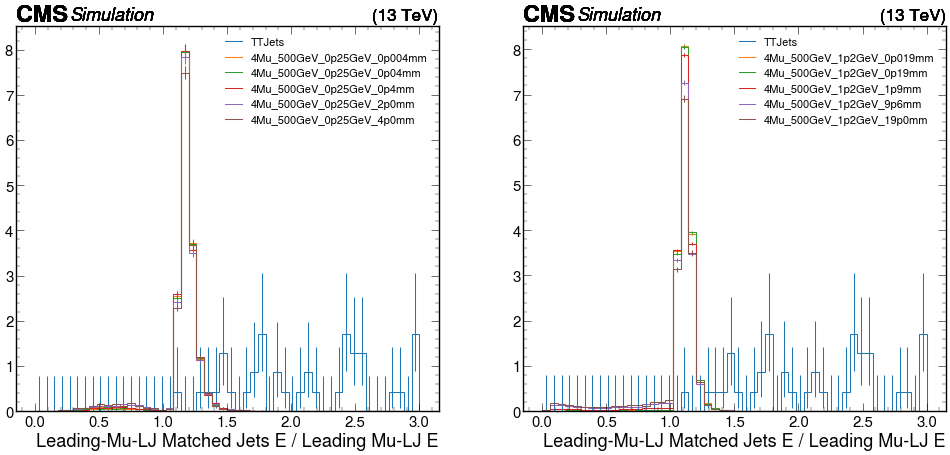

In [18]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

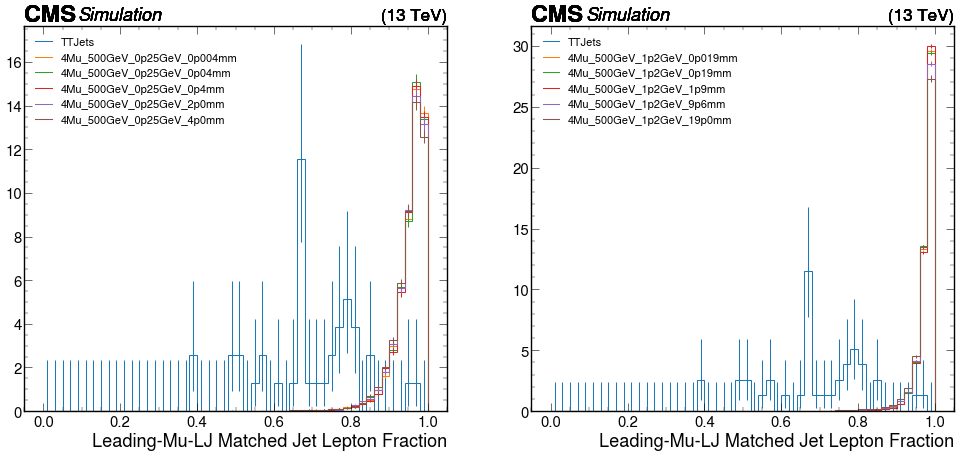

In [19]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=2, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=2, prop={'size': 16})

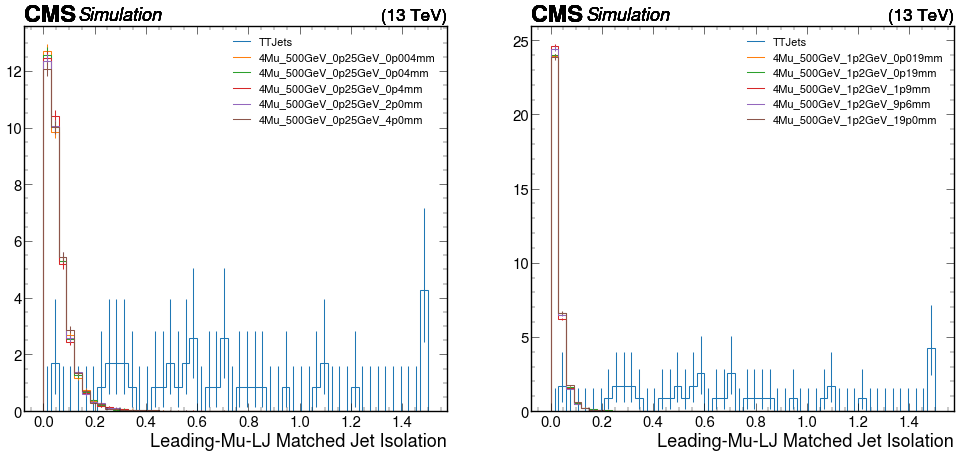

In [20]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

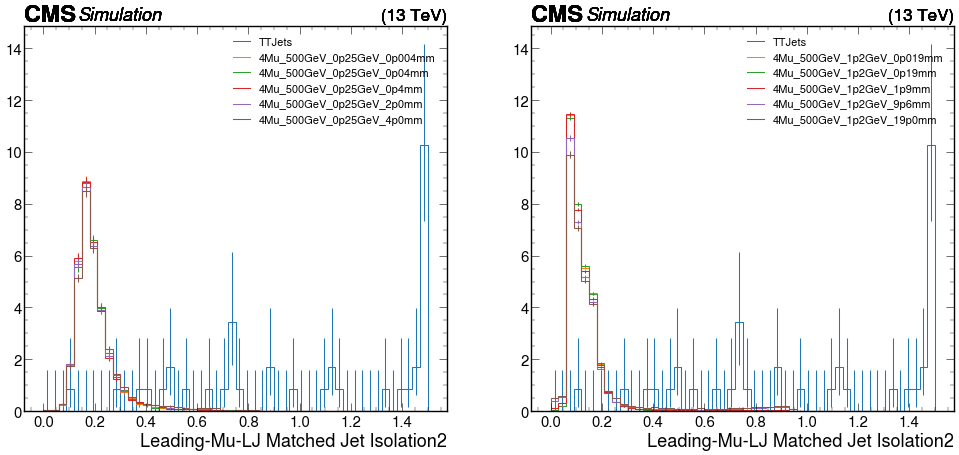

In [21]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

In [22]:
for sample in samples_100_025:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

4Mu_500GeV_0p25GeV_0p004mm Total LJs 14827
4Mu_500GeV_0p25GeV_0p004mm Total Mu-LJs 14801
4Mu_500GeV_0p25GeV_0p004mm Total EGM-LJs 26

4Mu_500GeV_0p25GeV_0p004mm Total Matched-Jets 14801
4Mu_500GeV_0p25GeV_0p004mm Total Leading-Mu-Matched-Jets 7401
4Mu_500GeV_0p25GeV_0p004mm Total Subleading-Mu-Matched-Jets 7395
4Mu_500GeV_0p25GeV_0p004mm Total EGM-Matched-Jets 26
##############################

4Mu_500GeV_0p25GeV_0p04mm Total LJs 12428
4Mu_500GeV_0p25GeV_0p04mm Total Mu-LJs 12411
4Mu_500GeV_0p25GeV_0p04mm Total EGM-LJs 17

4Mu_500GeV_0p25GeV_0p04mm Total Matched-Jets 12411
4Mu_500GeV_0p25GeV_0p04mm Total Leading-Mu-Matched-Jets 6205
4Mu_500GeV_0p25GeV_0p04mm Total Subleading-Mu-Matched-Jets 6205
4Mu_500GeV_0p25GeV_0p04mm Total EGM-Matched-Jets 17

In [23]:
for sample in samples_100_125:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

4Mu_500GeV_1p2GeV_0p019mm Total LJs 145584
4Mu_500GeV_1p2GeV_0p019mm Total Mu-LJs 145507
4Mu_500GeV_1p2GeV_0p019mm Total EGM-LJs 77

4Mu_500GeV_1p2GeV_0p019mm Total Matched-Jets 145502
4Mu_500GeV_1p2GeV_0p019mm Total Leading-Mu-Matched-Jets 72750
4Mu_500GeV_1p2GeV_0p019mm Total Subleading-Mu-Matched-Jets 72745
4Mu_500GeV_1p2GeV_0p019mm Total EGM-Matched-Jets 77
##############################

4Mu_500GeV_1p2GeV_0p19mm Total LJs 113354
4Mu_500GeV_1p2GeV_0p19mm Total Mu-LJs 113301
4Mu_500GeV_1p2GeV_0p19mm Total EGM-LJs 53

4Mu_500GeV_1p2GeV_0p19mm Total Matched-Jets 113297
4Mu_500GeV_1p2GeV_0p19mm Total Leading-Mu-Matched-Jets 56649
4Mu_500GeV_1p2GeV_0p19mm Total Subleading-Mu-Matched-Jets 56646
4Mu_500GeV_1p2GeV_0p19mm Total EGM-Matched-Jets 53
###